#### Data Exploration and Feature Engineering

In this section, we will perform initial data exploration, feature engineering, and data visualization to prepare our dataset for machine learning tasks. Here's an overview of the steps we will take:

### Step a: Download the Dataset
We will fetch our dataset from the provided by edge-ml.

### Step b: Data Integration
We will combine all the individual datasets into a single Pandas DataFrame, ensuring that our data is structured for analysis and modeling.

### Step c: Feature Extraction
Using the Pandas library, we will create rolling windows of data to perform time-based feature extraction. We will compute statistics such as mean and variance within these windows to create meaningful features.

### Step d: Data Visualization
We will employ the Seaborn library to visualize our feature space.

### Step e: Feature Normalization
To ensure that our features are on a consistent scale, we will normalize the data. Normalization helps prevent features with larger scales from dominating in certain machine learning algorithms.

Throughout these steps, we will gradually refine and prepare our dataset for the subsequent machine learning tasks. Let's get started!


In [1]:
from edgeml import DatasetReceiver
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
project = DatasetReceiver("https://app.edge-ml.org", "3220e00cec76db63f6bd5f6e4b3c1f4f")

In [2]:
project.datasets[0].loadData()
project.datasets[0].data.head()

,time,accX,accY,accZ,acc
0,2023-09-15 15:11:03.441,-0.66,0.22,-1.22,Walk
1,2023-09-15 15:11:03.458,-1.21,0.24,-0.83,Walk
2,2023-09-15 15:11:03.475,-1.18,0.71,-0.82,Walk
3,2023-09-15 15:11:03.491,-0.27,0.93,0.04,Walk
4,2023-09-15 15:11:03.508,0.75,0.66,0.49,Walk


In [10]:
import pandas as pd

group_count = 1
dataset_to_group = {}
df = pd.DataFrame()

for dataset in project.datasets:
    dataset.loadData()
    data = dataset.data
    
    if data is not None:
        # Check if the dataset name already has a group assigned
        if dataset.name in dataset_to_group:
            group = dataset_to_group[dataset.name]
        else:
            # If not, assign a new group identifier using group_count
            print(f"Assigning group {group_count} to dataset: " + dataset.name)
            group = group_count
            dataset_to_group[dataset.name] = group_count
            group_count += 1
        
        # Add the 'group' column to the data
        data['group'] = group
        df = df.append(data, ignore_index=True)

# Rename 'acc' column with 'target'
df = df.rename(columns={'acc': 'target'})

# Drop empty or empty string target values
df = df.dropna(subset=['target'])
df = df[df.target != '']

<class 'pandas.core.frame.DataFrame'>
Assigning group 1 to dataset: datasetName
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Assignin

In [11]:
df['group'].unique()

array([1, 2])

In [12]:
df.describe()

,accX,accY,accZ,group
count,57632.000000,57747.000000,57709.000000,58579.000000
mean,-0.671672,0.550545,-0.332492,1.208539
std,3.883492,3.632939,2.398868,0.406267
min,-71.709999,-58.950001,-48.270000,1.000000
25%,-1.610000,-0.910000,-1.340000,1.000000
50%,-0.090000,0.080000,-0.030000,1.000000
75%,0.660000,1.580000,0.840000,1.000000
max,40.630001,59.169998,41.970001,2.000000


In [13]:
# clean df
df = df.dropna()
df = df.drop_duplicates()
df.describe()

,accX,accY,accZ,group
count,33291.000000,33291.000000,33291.000000,33291.000000
mean,-0.812685,0.713614,-0.473579,1.154486
std,4.706778,4.378281,2.658917,0.361420
min,-71.709999,-58.950001,-48.270000,1.000000
25%,-2.160000,-1.070000,-1.640000,1.000000
50%,-0.120000,0.080000,-0.120000,1.000000
75%,0.990000,2.040000,0.800000,1.000000
max,40.630001,59.169998,41.970001,2.000000


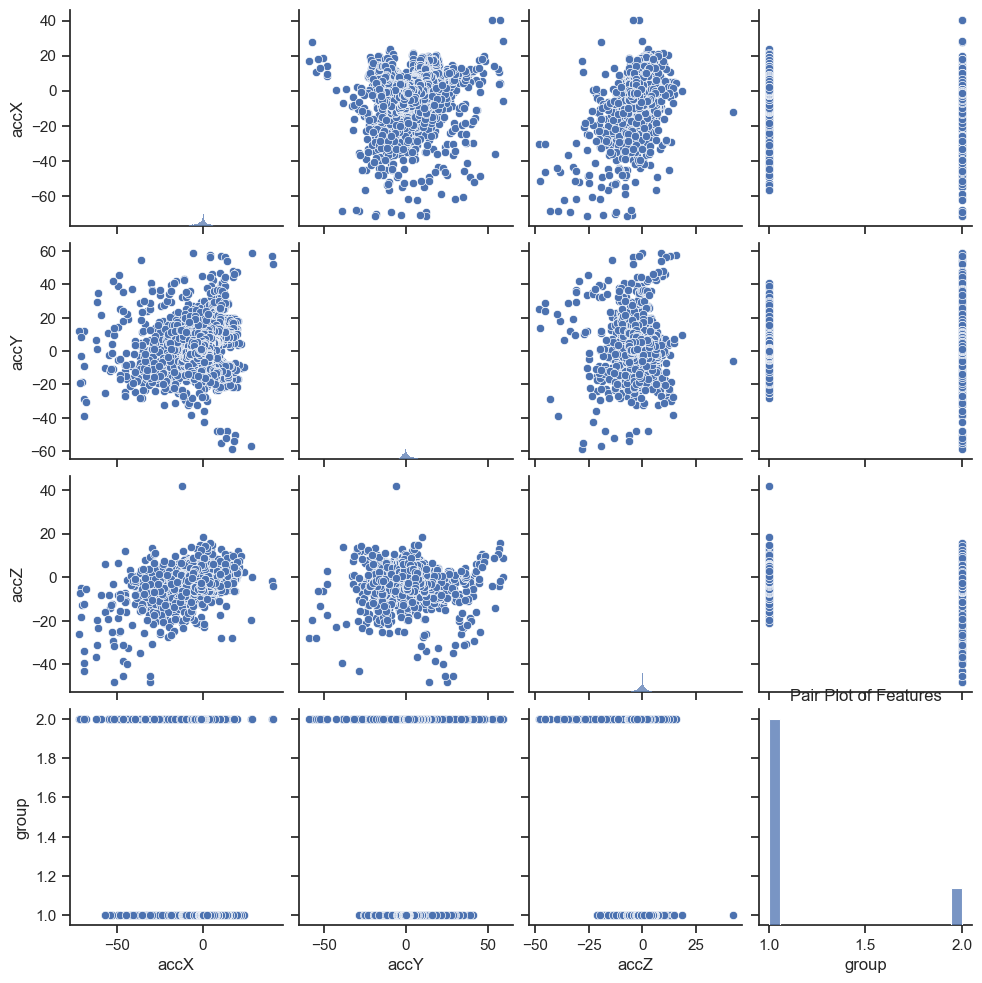

In [14]:
sns.set(style="ticks")
sns.pairplot(df)
plt.title('Pair Plot of Features')
plt.show()


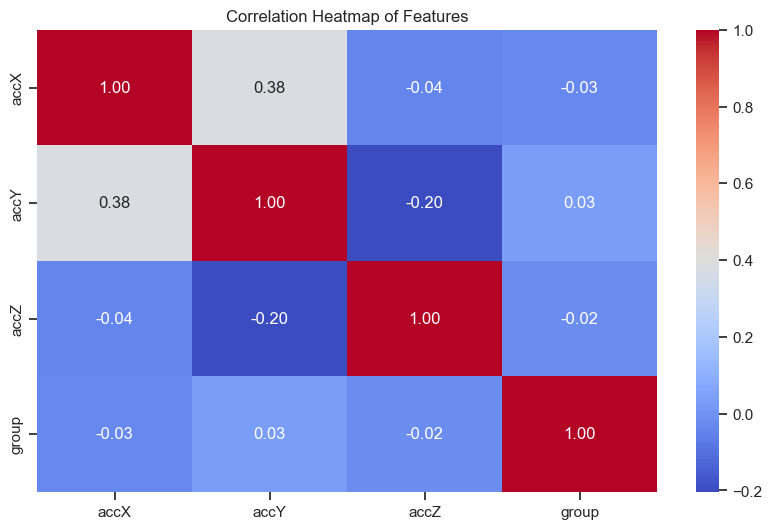

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


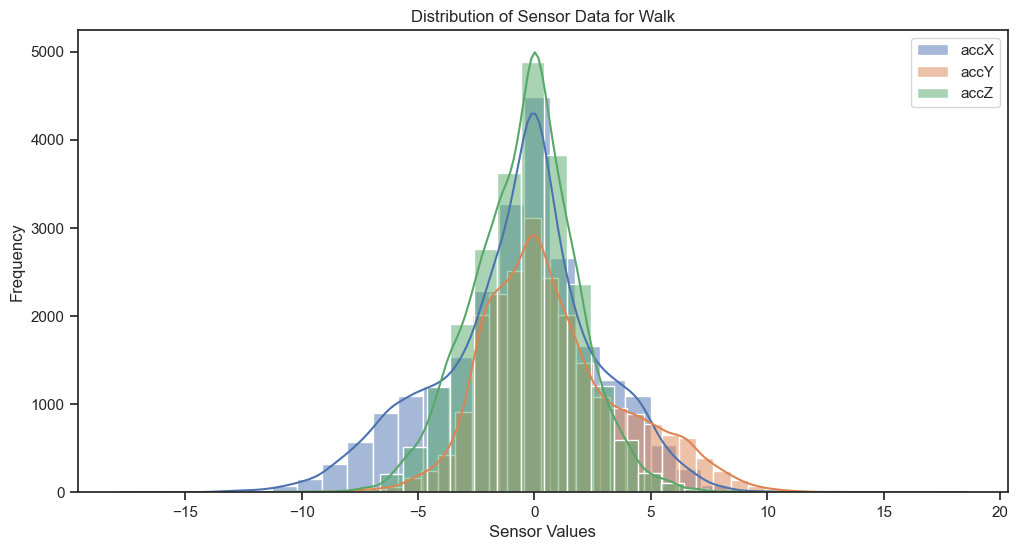

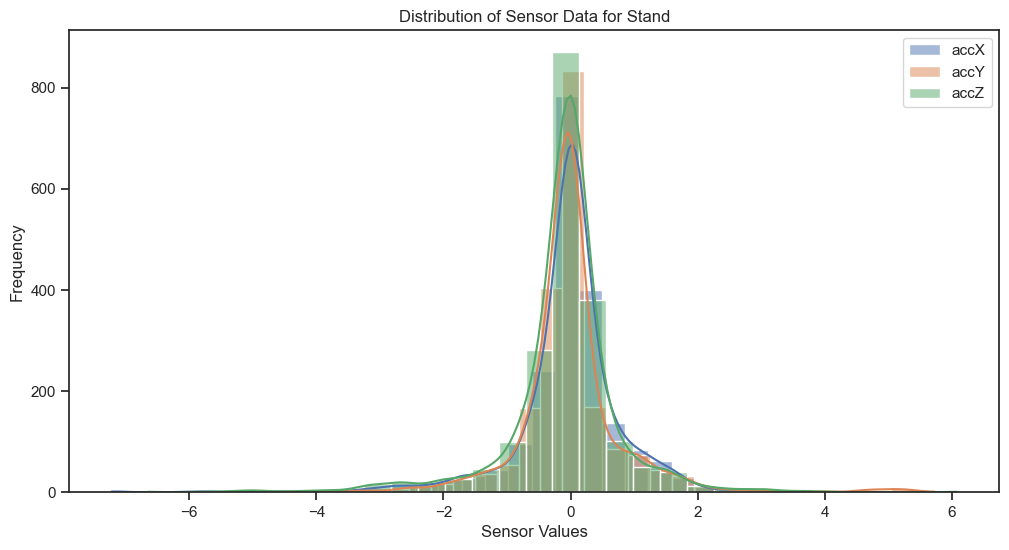

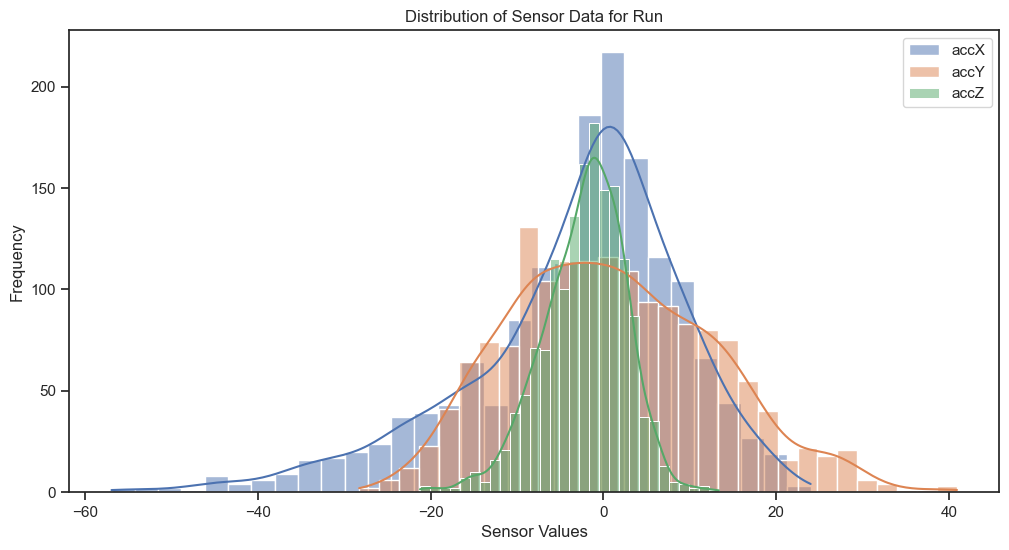

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with the relevant columns

# Filter the data for each target class
target_classes = ['Walk', 'Stand', 'Run']

for target_class in target_classes:
    target_data = df[df['target'] == target_class]
    
    if not target_data.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=target_data, x='accX', bins=30, label='accX', kde=True)
        sns.histplot(data=target_data, x='accY', bins=30, label='accY', kde=True)
        sns.histplot(data=target_data, x='accZ', bins=30, label='accZ', kde=True)
        plt.xlabel('Sensor Values')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Sensor Data for {target_class}')
        plt.legend()
        plt.show()
    else:
        print(f"No data found for target class {target_class}")



In [15]:
import pandas as pd

window_size = 10

# Create a new DataFrame to store the features
window_df = pd.DataFrame()

# Define the columns for which you want to calculate mean and variance
columns_to_process = ["accX", "accY", "accZ"]

# Loop through each column and calculate mean and variance for the windows
for column in columns_to_process:
    # Calculate the rolling mean for the current column
    mean_col = df[column].rolling(window=window_size).mean()    
    # Calculate the rolling variance for the current column
    var_col = df[column].rolling(window=window_size).var()

    # Add the mean and variance as features to the features DataFrame
    window_df[f"{column}_mean"] = mean_col
    window_df[f"{column}_variance"] = var_col

window_df['target'] = df['target']
window_df['group'] = df['group']

window_df.dropna(inplace=True)

window_df.head()


,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,-0.106,0.579138,0.476,0.079093,-0.120,0.388422,Walk,1
11,-0.118,0.595351,0.405,0.169894,-0.096,0.335516,Walk,1
12,-0.058,0.485751,0.329,0.255521,-0.116,0.372138,Walk,1
13,0.049,0.333454,0.216,0.287538,-0.141,0.417499,Walk,1
14,0.107,0.325979,0.108,0.232818,-0.322,0.672307,Walk,1


In [16]:
target_classes = ['Walk', 'Stand', 'Run']
for target_class in target_classes:
    target_data = window_df[window_df['target'] == target_class]
    
    if not target_data.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=target_data, x='accX_mean', bins=30, label='accX_mean', kde=True)
        sns.histplot(data=target_data, x='accY_mean', bins=30, label='accY_mean', kde=True)
        sns.histplot(data=target_data, x='accZ_mean', bins=30, label='accZ_mean', kde=True)
        plt.xlabel('Sensor Values')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Sensor Data for {target_class}')
        plt.legend()
        plt.show()
    else:
        print(f"No data found for target class {target_class}")

NameError: name 'target_classes' is not defined

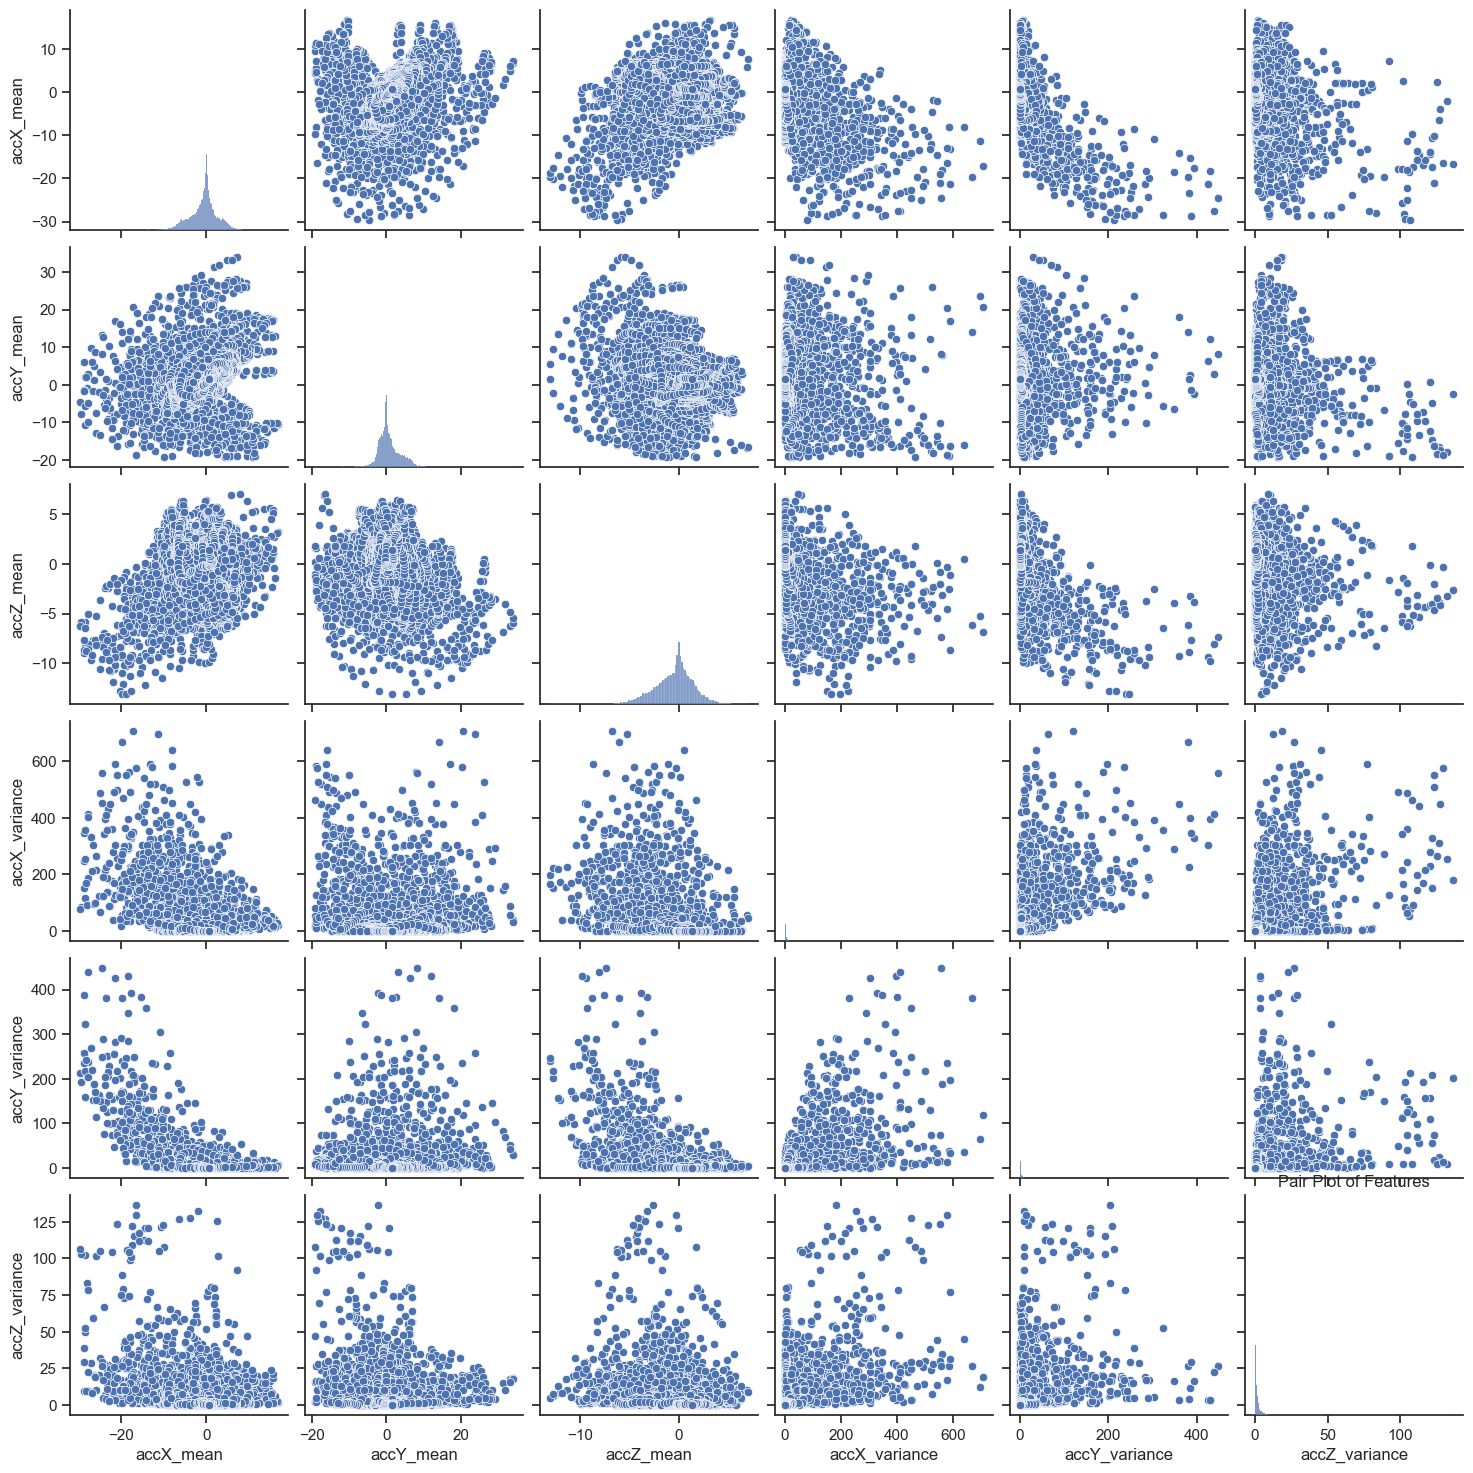

In [ ]:
sns.set(style="ticks")
sns.pairplot(window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']])
plt.title('Pair Plot of Features')
plt.show()


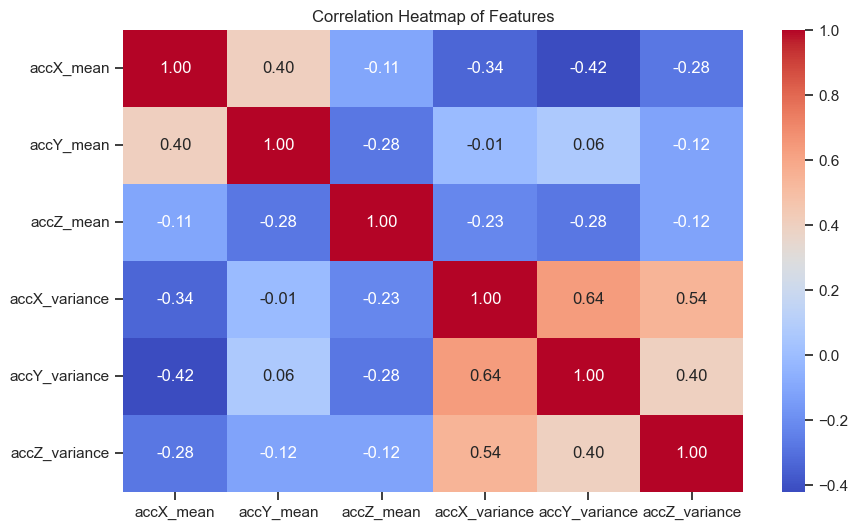

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


In [ ]:
window_df.head()

,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,-0.106,0.579138,0.476,0.079093,-0.120,0.388422,Walk,0
11,-0.118,0.595351,0.405,0.169894,-0.096,0.335516,Walk,0
12,-0.058,0.485751,0.329,0.255521,-0.116,0.372138,Walk,0
13,0.049,0.333454,0.216,0.287538,-0.141,0.417499,Walk,0
14,0.107,0.325979,0.108,0.232818,-0.322,0.672307,Walk,0


In [17]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']] = Scaler.fit_transform(window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']])
window_df.head()

,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,0.185195,-0.153926,-0.060724,-0.123366,0.166332,-0.167096,Walk,1
11,0.182050,-0.153608,-0.078864,-0.120702,0.177638,-0.170690,Walk,1
12,0.197774,-0.155754,-0.098283,-0.118190,0.168216,-0.168202,Walk,1
13,0.225815,-0.158735,-0.127154,-0.117251,0.156439,-0.165120,Walk,1
14,0.241014,-0.158881,-0.154748,-0.118856,0.071174,-0.147810,Walk,1


Excercise 4

a. Do a leave-one-subject out test train split, e.g. using skleanr: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html
b. Train different classifiers like those used here: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html and compare accuracy, precission, recall, F1-Score
c. Compare leave one subject out against simple 10-fold crossvalidation results of best models
d. Select a feature subset you believe is good based on the last excercise and compare best models
e. Perform a recursive https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html on models that support

In [18]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

label_encoder = LabelEncoder()

X = window_df.drop(columns=['target'])
y = label_encoder.fit_transform(window_df['target'])


print("Class distribution before oversampling:", Counter(window_df['target']))

# Initialize SMOTE
#smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to oversample the minority classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)
y_resampled

Class distribution before oversampling: Counter({'Walk': 25927, 'Stand': 5541, 'Run': 1814})
Class distribution after oversampling: Counter({2: 25927, 1: 25927, 0: 25927})
Label Mapping: {'Run': 0, 'Stand': 1, 'Walk': 2}


array([2, 2, 2, ..., 1, 1, 1])

In [20]:
X_resampled.head()

,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,group
0,0.185195,-0.153926,-0.060724,-0.123366,0.166332,-0.167096,1
1,0.182050,-0.153608,-0.078864,-0.120702,0.177638,-0.170690,1
2,0.197774,-0.155754,-0.098283,-0.118190,0.168216,-0.168202,1
3,0.225815,-0.158735,-0.127154,-0.117251,0.156439,-0.165120,1
4,0.241014,-0.158881,-0.154748,-0.118856,0.071174,-0.147810,1


In [21]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define a list of classifiers
classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier(n_estimators=100))
]

# Initialize LeaveOneGroupOut
logo = LeaveOneGroupOut()

# Initialize dictionaries to accumulate metrics for each classifier
metrics = {classifier_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for classifier_name, _ in classifiers}

groups = X_resampled['group']

# Iterate through the LeaveOneGroupOut splits
for train_index, test_index in logo.split(X_resampled, y_resampled, groups=groups):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    # Iterate through each classifier
    for classifier_name, classifier in classifiers:
        # Initialize and train the classifier
        classifier.fit(X_train, y_train)
    
        # Make predictions on the test set
        y_pred = classifier.predict(X_test)
    
        # Calculate metrics and store them
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        metrics[classifier_name]['accuracy'].append(accuracy)
        metrics[classifier_name]['precision'].append(precision)
        metrics[classifier_name]['recall'].append(recall)
        metrics[classifier_name]['f1_score'].append(f1)

# Print metrics for each classifier
for classifier_name, classifier_metrics in metrics.items():
    print(f"Metrics for {classifier_name}:")
    print(f"  Accuracy: {sum(classifier_metrics['accuracy']) / len(classifier_metrics['accuracy'])}")
    print(f"  Precision: {sum(classifier_metrics['precision']) / len(classifier_metrics['precision'])}")
    print(f"  Recall: {sum(classifier_metrics['recall']) / len(classifier_metrics['recall'])}")
    print(f"  F1-Score: {sum(classifier_metrics['f1_score']) / len(classifier_metrics['f1_score'])}")
    print()


Metrics for K-Nearest Neighbor:
  Accuracy: 0.7039068116854365
  Precision: 0.835768207879619
  Recall: 0.7039068116854365
  F1-Score: 0.734856939333014

Metrics for Naïve Bayes:
  Accuracy: 0.8485279161239598
  Precision: 0.8775497973947176
  Recall: 0.8485279161239598
  F1-Score: 0.855807558725749

Metrics for Decision Tree:
  Accuracy: 0.6618054313432538
  Precision: 0.8541030207936624
  Recall: 0.6618054313432538
  F1-Score: 0.7112082445536458

Metrics for Support Vector Machines:
  Accuracy: 0.6728433764075451
  Precision: 0.8080112043407832
  Recall: 0.6728433764075451
  F1-Score: 0.6890364536706062

Metrics for Random Forests:
  Accuracy: 0.7068591749341293
  Precision: 0.8690188348028811
  Recall: 0.7068591749341293
  F1-Score: 0.7484422198530465



In [26]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

# Import your models, metrics, and dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # Replace with your model imports
from sklearn.svm import SVC  # Replace with your model imports

classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier(n_estimators=100))
]

# Initialize a KFold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize dictionaries to accumulate metrics for each classifier
metrics = {classifier_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for classifier_name, _ in classifiers}

# Iterate through the KFold splits
for train_index, test_index in kf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    # Iterate through each classifier
    for classifier_name, classifier in classifiers:
        # Initialize and train the classifier
        classifier.fit(X_train, y_train)
    
        # Make predictions on the test set
        y_pred = classifier.predict(X_test)
    
        # Calculate metrics and store them
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        metrics[classifier_name]['accuracy'].append(accuracy)
        metrics[classifier_name]['precision'].append(precision)
        metrics[classifier_name]['recall'].append(recall)
        metrics[classifier_name]['f1_score'].append(f1)

# Print metrics for each classifier
for classifier_name, classifier_metrics in metrics.items():
    print(f"Metrics for {classifier_name}:")
    print(f"  Accuracy: {np.mean(classifier_metrics['accuracy'])}")
    print(f"  Precision: {np.mean(classifier_metrics['precision'])}")
    print(f"  Recall: {np.mean(classifier_metrics['recall'])}")
    print(f"  F1-Score: {np.mean(classifier_metrics['f1_score'])}")
    print()

Metrics for K-Nearest Neighbor:
  Accuracy: 0.9604145137476265
  Precision: 0.9616993681137777
  Recall: 0.9604145137476265
  F1-Score: 0.9599922204695795

Metrics for Naïve Bayes:
  Accuracy: 0.8181946561760404
  Precision: 0.8324297748890646
  Recall: 0.8181946561760404
  F1-Score: 0.8182708084170678

Metrics for Decision Tree:
  Accuracy: 0.9600159487482222
  Precision: 0.9599474875409293
  Recall: 0.9600159487482222
  F1-Score: 0.9599364352685704

Metrics for Support Vector Machines:
  Accuracy: 0.8476748639642746
  Precision: 0.8566277725377794
  Recall: 0.8476748639642746
  F1-Score: 0.847902813887812

Metrics for Random Forests:
  Accuracy: 0.9809722416283121
  Precision: 0.9809823517295779
  Recall: 0.9809722416283121
  F1-Score: 0.9809628491382643



The following code block is commented out because it was found that collecting sensor data using Safari on an iPhone was difficult, resulting in a dataset with only 6 features. In the context of feature selection and Recursive Feature Elimination (RFE), it does not make sense to execute the RFE algorithm with such a small number of features. 

The code attempted to perform RFE (Recursive Feature Elimination) on various machine learning classifiers to select the top 3 features for each classifier. The classifiers included in the loop are:

1. Decision Tree
2. Support Vector Machines

For each classifier, the code used RFE to select 3 features based on their importance and then printed the selected features and their rankings. This process was meant to help in feature selection and potentially improve model performance.

However, due to the limited number of features (only 6 in this case), the RFE algorithm's effectiveness is limited. Therefore, the code has been commented out, as it would not provide meaningful results with such a small feature set.


In [31]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

classifiers = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forests", RandomForestClassifier()),
]

for classifier_name, model in classifiers:
    print(f"RFE for {classifier_name}:")

    rfe = RFE(model, n_features_to_select=5, step=1)

    rfe.fit(X_resampled, y_resampled)
    
    selected_features = rfe.support_

    # Get the column names of your dataset
    feature_names = X_resampled.columns  # Assuming X_resampled is a DataFrame

    # Print the selected feature names
    print("Selected Features:")
    for feature, selected in zip(feature_names, selected_features):
        if selected:
            print(feature)
    print()

RFE for Decision Tree:
Selected Features:
accX_mean
accX_variance
accY_mean
accY_variance
accZ_mean

RFE for Random Forests:
Selected Features:
accX_mean
accX_variance
accY_mean
accY_variance
accZ_variance



a. choose a model you want to optimize and build your own Bayesian Optimizer using https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html

In [33]:
from skopt import BayesSearchCV

# Define the parameter space for the search
search_space = {
    'n_estimators': (50, 500),
    'max_depth': (1, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
    'max_features': (1, 6)
}

# Initialize a BayesSearchCV object
bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(),
    search_spaces=search_space,
    n_iter=10,
    cv=10,
    n_jobs=-1,
    random_state=42
)

# Perform the search
bayes_search.fit(X_resampled, y_resampled)

BayesSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=10, n_jobs=-1,
              random_state=42,
              search_spaces={'max_depth': (1, 10), 'max_features': (1, 6),
                             'min_samples_leaf': (1, 10),
                             'min_samples_split': (2, 10),
                             'n_estimators': (50, 500)})

In [24]:
bayes_search.best_params_

OrderedDict([('max_depth', 10),
             ('max_features', 5),
             ('min_samples_leaf', 9),
             ('min_samples_split', 5),
             ('n_estimators', 44)])

In [35]:
from sklearn.model_selection import train_test_split

final_model = RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=9, min_samples_split=5, n_estimators=44)
X = X_resampled[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']]
y = y_resampled

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
final_model.fit(Xtrain, ytrain)
final_model.score(Xtest, ytest)

0.8843306841203055

In [37]:
import autosklearn

automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder="/tmp/autosklearn_resampling_example_tmp",
    disable_evaluator_output=False,
    resampling_strategy="cv-iterative-fit",
    resampling_strategy_arguments={"folds": 10},
)
automl.fit(X_train, y_train)
predictions = automl.predict(X_test)

ModuleNotFoundError: No module named 'autosklearn'

Deployment

In [ ]:
### Fit best model
from sklearn.externals import joblib
joblib.dump(clf, 'svm_model.pkl')

In [ ]:
from skl2onnx import convert
from skl2onnx.common.data_types import FloatTensorType

# Load the saved model
clf = joblib.load('svm_model.pkl')

# Convert the model to ONNX format
initial_type = [('input', FloatTensorType([None, X.shape[1]]))]
onx = convert(clf, initial_types=initial_type)

# Save the ONNX model
with open("svm_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())